In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeRegressor

sns.set(style='dark')

# LOAD DATA

In [2]:
data = pd.read_csv('data_1.csv')
print(data.shape)
data.head()

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# CHECK MISSING VALUES

In [3]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# FAST STATISTICAL INFO   

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# FIND CATEGORICAL COLUMNS

In [5]:
# Count categorical columns
cols = data.columns
num_cols = data._get_numeric_data().columns
print(num_cols)

# Get categorical
categorical = list(set(cols) - set(num_cols))
print(categorical)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
['diagnosis']


# Make one-hot encoding 

In [6]:
for col in categorical:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


# Drop useless columns

In [7]:
train_data = data.copy()
train_data.drop('diagnosis_B', axis=1, inplace=True)
train_data.drop('diagnosis_M', axis=1, inplace=True)
train_data.drop('id', axis=1, inplace=True)
train_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# 1) KMeans algorithm  
# Normilize data and find number of centroids

In [8]:
mms = MinMaxScaler()
mms.fit(train_data)
data_transformed = mms.transform(train_data)

# Select number of clusters
sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

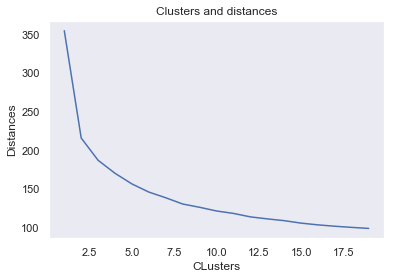

In [9]:
plt.plot(K, sum_of_squared_distances)
plt.title('Clusters and distances')
plt.xlabel('CLusters')
plt.ylabel('Distances')
plt.show()

# Find centroids

In [10]:
kmeans = KMeans(n_clusters=2).fit(data_transformed)
centroids = kmeans.cluster_centers_
centroids

array([[0.50483563, 0.39560329, 0.50578661, 0.36376576, 0.46988732,
        0.42226302, 0.41838662, 0.46928035, 0.45899738, 0.29945886,
        0.19093085, 0.19112073, 0.17903433, 0.13086432, 0.18017962,
        0.25890126, 0.12542475, 0.30942779, 0.190072  , 0.13266975,
        0.48047448, 0.45107371, 0.4655302 , 0.31460597, 0.49868817,
        0.36391461, 0.39027292, 0.65827197, 0.33752296, 0.26041387],
       [0.25535358, 0.28833455, 0.24696416, 0.14388369, 0.35743076,
        0.18019471, 0.10344776, 0.1306603 , 0.34011829, 0.25591606,
        0.06427485, 0.18843043, 0.05975663, 0.02870108, 0.18158628,
        0.13242941, 0.05821528, 0.18069336, 0.17221057, 0.08403996,
        0.2052406 , 0.32069002, 0.19242138, 0.09943446, 0.3571115 ,
        0.14873935, 0.13142287, 0.26231363, 0.22639412, 0.15437354]])

# Inverse scaling of centroids

In [11]:
centroids_inverse_scale = mms.inverse_transform(centroids)
centroids_inverse_scale

array([[1.76476720e+01, 2.14079894e+01, 1.16982381e+02, 1.00107778e+03,
        1.04679418e-01, 1.57046190e-01, 1.78567407e-01, 9.44192063e-02,
        1.96881481e-01, 6.41783069e-02, 6.38755556e-01, 1.22498307e+00,
        4.55664550e+00, 7.68664974e+01, 7.01334392e-03, 3.67241852e-02,
        4.96682011e-02, 1.63346931e-02, 2.13900370e-02, 4.73495238e-03,
        2.14361376e+01, 2.89442857e+01, 1.43883810e+02, 1.46526878e+03,
        1.46686349e-01, 4.02380423e-01, 4.88621693e-01, 1.91557143e-01,
        3.27725397e-01, 9.47426984e-02],
       [1.23763658e+01, 1.82360526e+01, 7.95281842e+01, 4.82705789e+02,
        9.22226053e-02, 7.81270789e-02, 4.41515018e-02, 2.62888526e-02,
        1.73343421e-01, 6.21108947e-02, 2.88995000e-01, 1.21281000e+00,
        2.02521500e+00, 2.21685000e+01, 7.05472368e-03, 1.98847105e-02,
        2.30532489e-02, 9.53880263e-03, 2.01206605e-02, 3.32735342e-03,
        1.36993132e+01, 2.40522895e+01, 8.90462895e+01, 5.89778947e+02,
        1.25247395e-01,

# Build dataframe with clusters

In [12]:
data_clustered = pd.DataFrame(centroids_inverse_scale, index=['Cluster 1', 'Cluster 2'], 
                              columns=train_data.columns)
data_clustered

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
Cluster 1,17.647672,21.407989,116.982381,1001.077778,0.104679,0.157046,0.178567,0.094419,0.196881,0.064178,...,21.436138,28.944286,143.883810,1465.268783,0.146686,0.402380,0.488622,0.191557,0.327725,0.094743
Cluster 2,12.376366,18.236053,79.528184,482.705789,0.092223,0.078127,0.044152,0.026289,0.173343,0.062111,...,13.699313,24.052289,89.046289,589.778947,0.125247,0.180597,0.164541,0.076333,0.271350,0.078576


# 2) Visualize KMeans

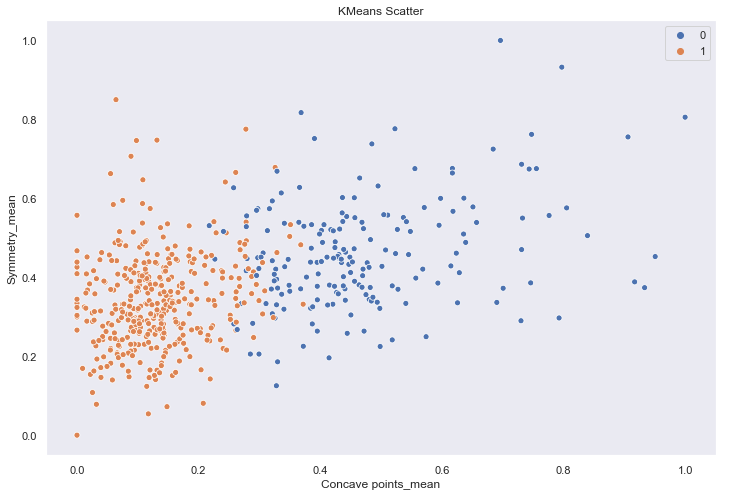

In [13]:
# Plot 2-d 
plt.figure(figsize=(12, 8))
sns.scatterplot(data_transformed[:, 7], data_transformed[:, 8], hue=kmeans.labels_)
plt.title('KMeans Scatter')
plt.xlabel('Concave points_mean')
plt.ylabel('Symmetry_mean')
plt.show()

# 3) Hierarchical clustering from SciPy

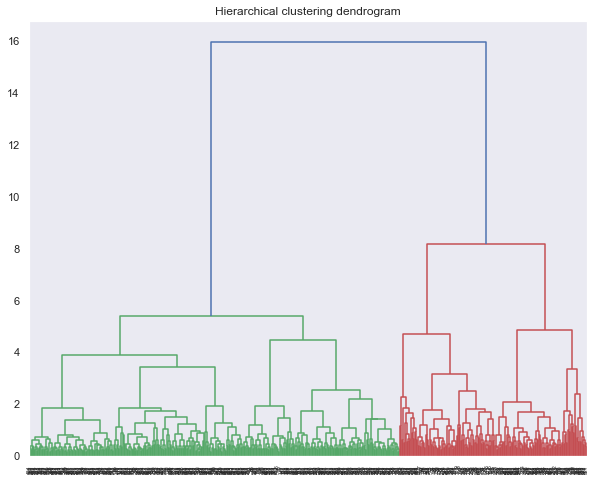

In [14]:
plt.figure(figsize=(10, 8))
dend = sch.dendrogram(sch.linkage(data_transformed, method='ward'))
plt.title('Hierarchical clustering dendrogram')
plt.show()

# 4) Hierarchical clustering from Sklearn: Agglomerative Clustering

In [15]:
# For 2 clusters
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster2.fit_predict(data_transformed)

# For 3 clusters
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster3.fit_predict(data_transformed)

array([1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

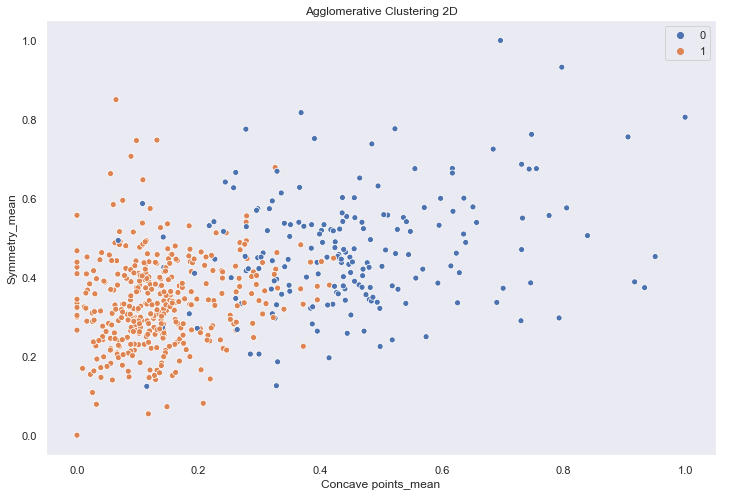

In [16]:
# Plot 2-d 
plt.figure(figsize=(12, 8))
sns.scatterplot(data_transformed[:, 7], data_transformed[:, 8], hue=cluster2.labels_)
plt.title('Agglomerative Clustering 2D')
plt.xlabel('Concave points_mean')
plt.ylabel('Symmetry_mean')
plt.show()

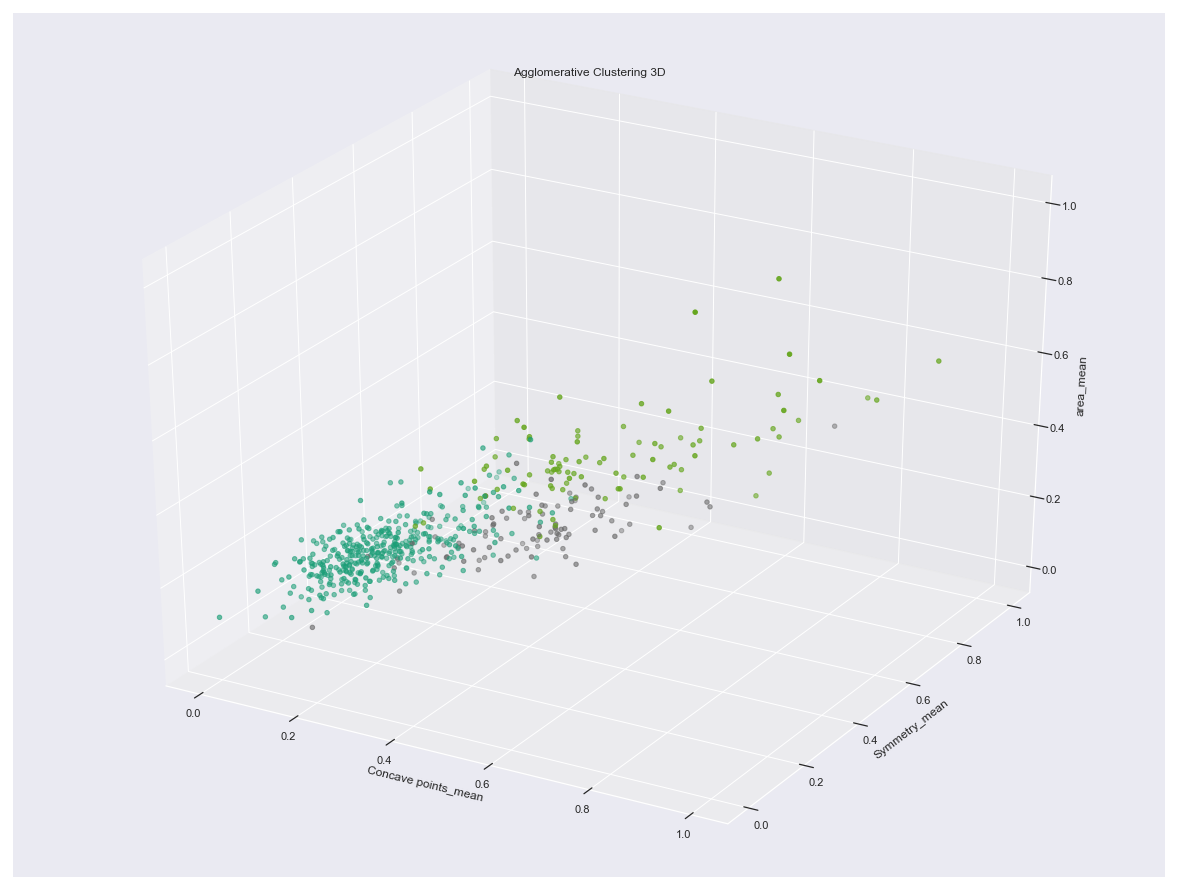

In [18]:
# plot 3-d
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)
ax.scatter(data_transformed[:, 7], data_transformed[:, 8],  data_transformed[:, 3], c=cluster3.labels_, cmap='Dark2')
plt.title('Agglomerative Clustering 3D')
plt.xlabel('Concave points_mean')
plt.ylabel('Symmetry_mean')
ax.set_zlabel('area_mean')
plt.show()

# 5) PCA

In [19]:
# Std data
x_std = StandardScaler().fit_transform(train_data)
x_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
# PCA - 2 components
pca_2 = PCA(n_components=2)
principalComp_2 = pca_2.fit_transform(x_std)
principDF_2 = pd.DataFrame(data=principalComp_2, columns=['principal_comp1', 'principal_comp2'])

# PCA - 3 components
pca_3 = PCA(n_components=3)
principalComp_3 = pca_3.fit_transform(x_std)
principDF_3 = pd.DataFrame(data=principalComp_3, columns=['principal_comp1', 'principal_comp2', 'principal_comp3'])
score = pca_2.score(x_std)
score

-31.684883509998414

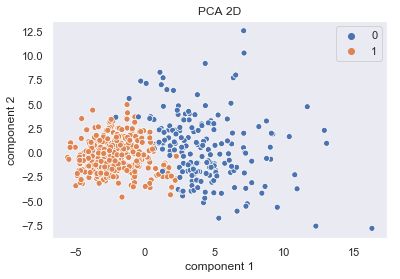

In [21]:
# Plot 2 components
sns.scatterplot(principDF_2['principal_comp1'], principDF_2['principal_comp2'], hue=cluster2.labels_)
plt.title('PCA 2D')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

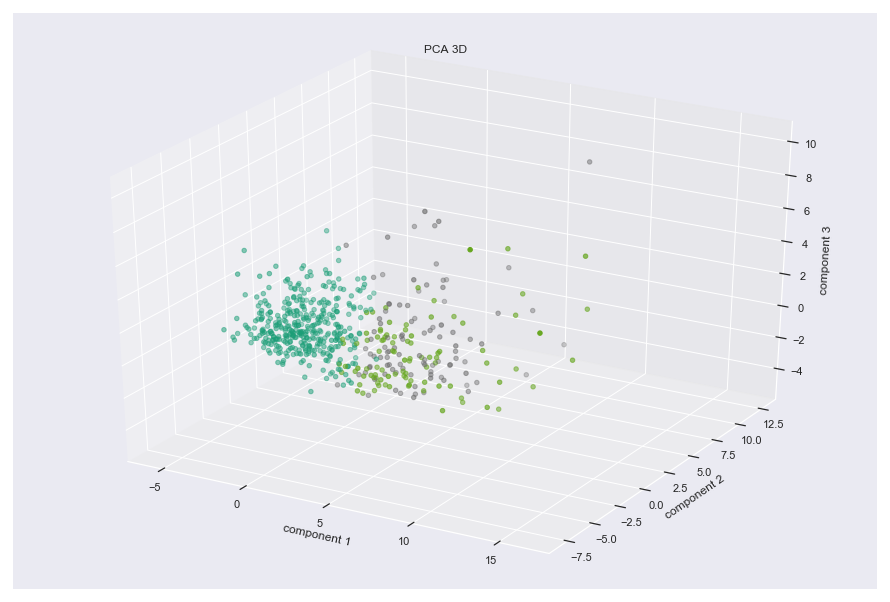

In [22]:
# Plot 3 components
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
ax.scatter(principDF_3['principal_comp1'], principDF_3['principal_comp2'], principDF_3['principal_comp3'], c=cluster3.labels_, 
           cmap='Dark2')
plt.title('PCA 3D')
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()

# Change "whiten" parameter

In [23]:
# PCA - 2 components
pca2_w = PCA(n_components=2, whiten=True)
principalComp2_w = pca2_w.fit_transform(x_std)
principDF2_w = pd.DataFrame(data=principalComp2_w, columns=['principal_comp1', 'principal_comp2'])

# PCA - 3 components
pca3_w = PCA(n_components=3, whiten=True)
principalComp3_w = pca3_w.fit_transform(x_std)
principDF3_w = pd.DataFrame(data=principalComp3_w, columns=['principal_comp1', 'principal_comp2', 'principal_comp3'])
score = pca2_w.score(x_std)
print(score)

-32.939198074802235


# Vizualize results

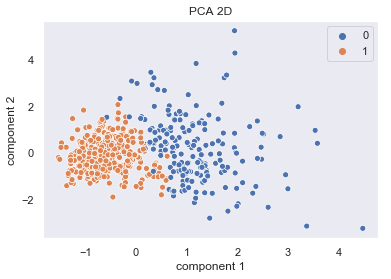

In [24]:
# Plot 2 components
sns.scatterplot(principDF3_w['principal_comp1'], principDF3_w['principal_comp2'], hue=cluster2.labels_)
plt.title('PCA 2D')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

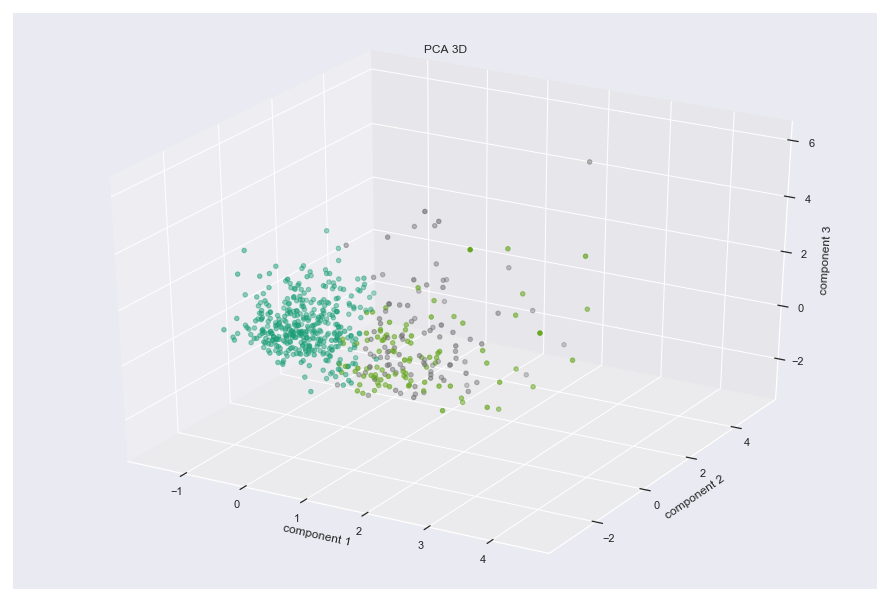

In [25]:
# Plot 3 components
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig)
ax.scatter(principDF3_w['principal_comp1'], principDF3_w['principal_comp2'], principDF3_w['principal_comp3'], c=cluster3.labels_,
          cmap='Dark2')
plt.title('PCA 3D')
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()

# 6) TSNE

In [26]:
# TSNE for 2 and 3 components
tsne2 = TSNE(n_components=2)
tsne3 = TSNE(n_components=3)

x_tsne2 = tsne2.fit_transform(x_std)
x_tsne3 = tsne3.fit_transform(x_std)

tsne2 = pd.DataFrame(data=x_tsne2, columns=['tsne_comp_1', 'tsne_comp_2'])
tsne3 = pd.DataFrame(data=x_tsne3, columns=['tsne_comp_1', 'tsne_comp_2', 'tsne_comp_3'])

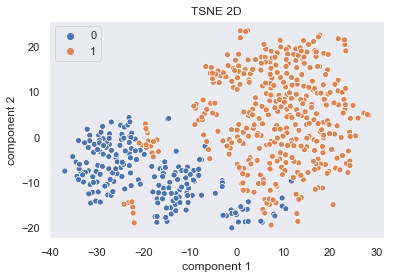

In [27]:
# Plot 2 components
sns.scatterplot(tsne2['tsne_comp_1'], tsne2['tsne_comp_2'], hue=cluster2.labels_)
plt.title('TSNE 2D')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

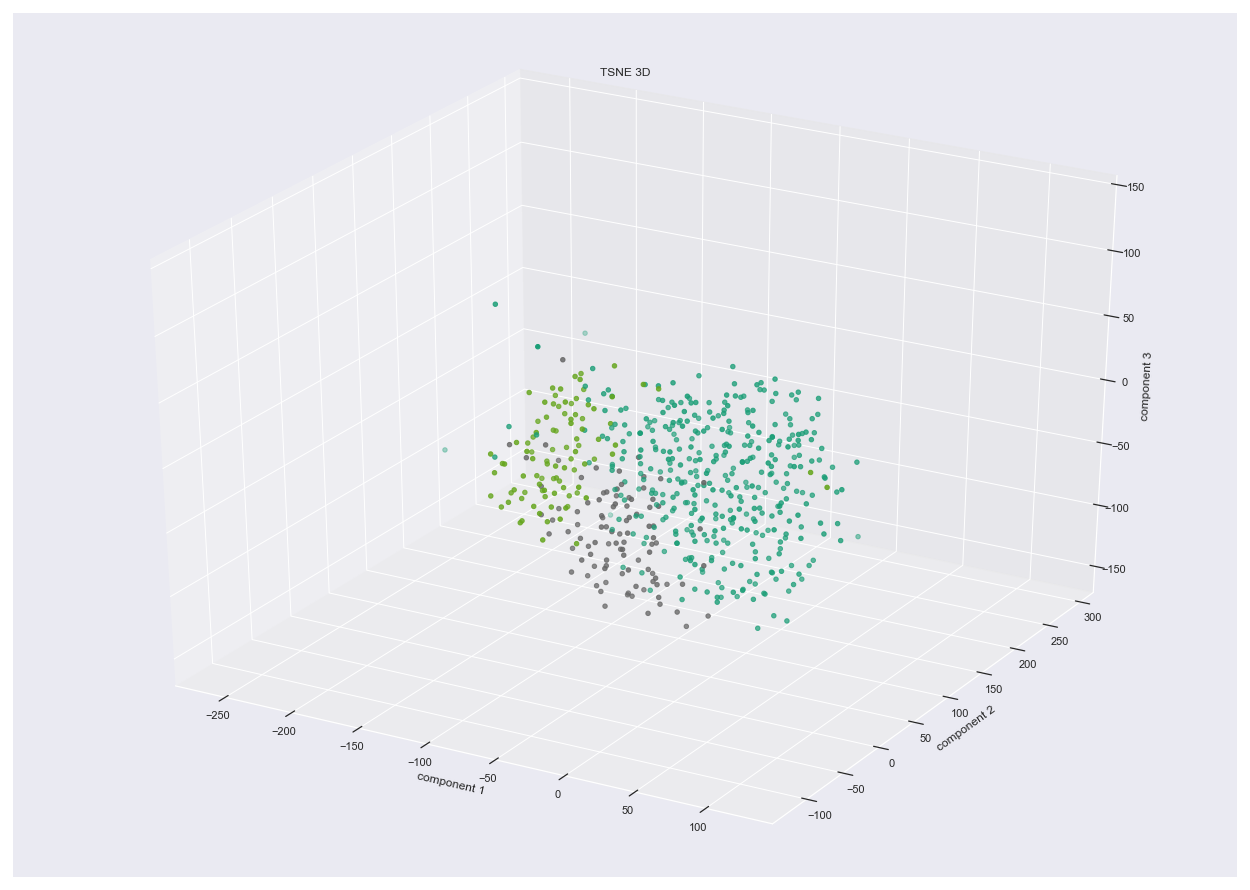

In [28]:
# Plot 3 components
fig = plt.figure(figsize=(17, 12))
ax = Axes3D(fig)
ax.scatter(tsne3['tsne_comp_1'], tsne3['tsne_comp_2'], tsne3['tsne_comp_3'], c=cluster3.labels_, cmap='Dark2')
plt.title('TSNE 3D')
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()

# Change 'learning_rate' and 'n_iter' parameters

In [29]:
# TSNE for 2 and 3 components
tsne2 = TSNE(n_components=2, learning_rate=600 , n_iter=2000)
tsne3 = TSNE(n_components=3, learning_rate=600 , n_iter=2000)

x_tsne2 = tsne2.fit_transform(x_std)
x_tsne3 = tsne3.fit_transform(x_std)

tsne2 = pd.DataFrame(data=x_tsne2, columns=['tsne_comp_1', 'tsne_comp_2'])
tsne3 = pd.DataFrame(data=x_tsne3, columns=['tsne_comp_1', 'tsne_comp_2', 'tsne_comp_3'])

# Vizualize results

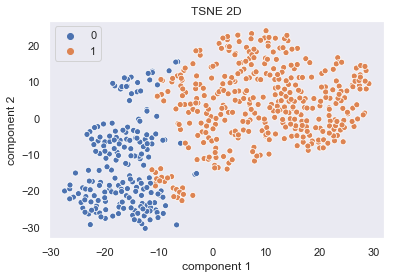

In [30]:
# Plot 2 components
sns.scatterplot(tsne2['tsne_comp_1'], tsne2['tsne_comp_2'], hue=cluster2.labels_)
plt.title('TSNE 2D')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

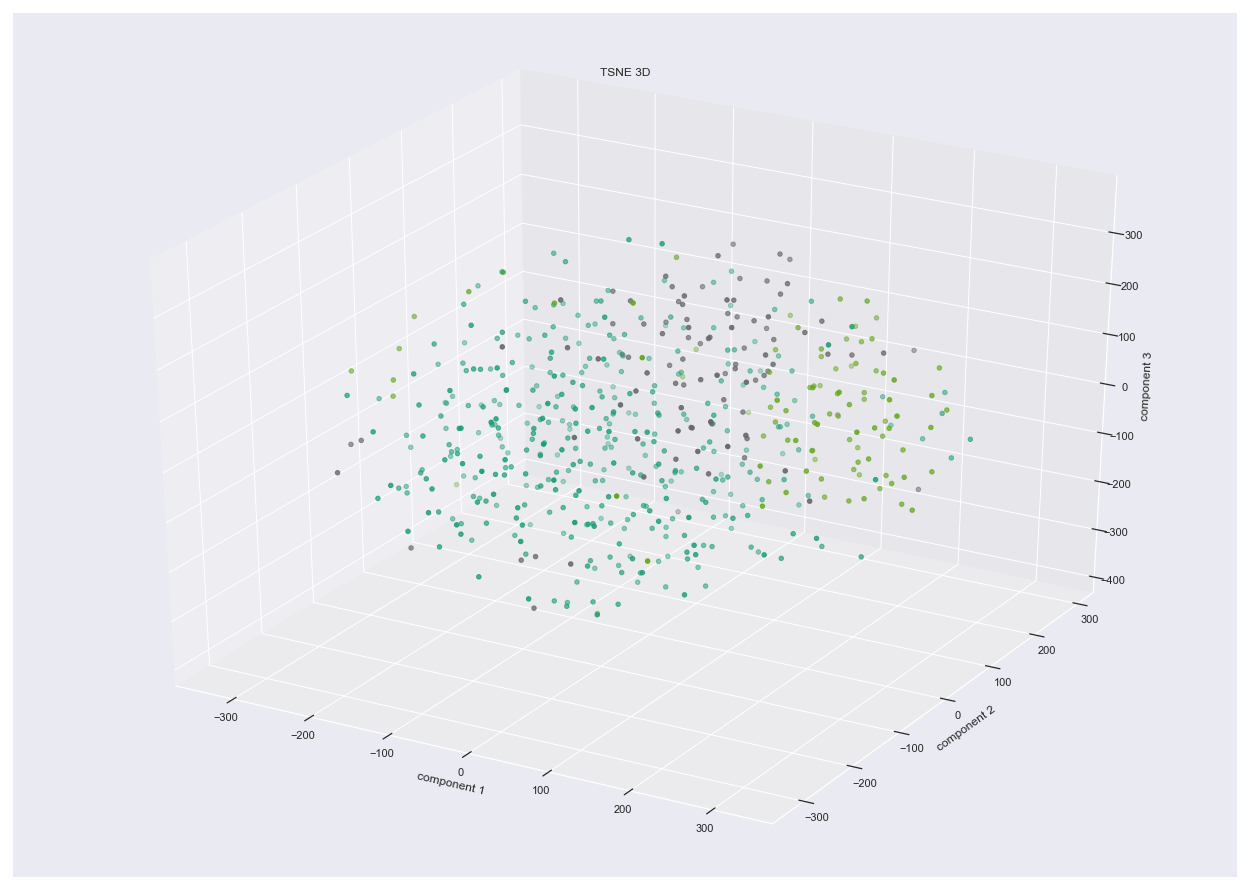

In [31]:
# Plot 3 components
fig = plt.figure(figsize=(17, 12))
ax = Axes3D(fig)
ax.scatter(tsne3['tsne_comp_1'], tsne3['tsne_comp_2'], tsne3['tsne_comp_3'], c=cluster3.labels_, cmap='Dark2')
plt.title('TSNE 3D')
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()

# 7) SVD


In [32]:
# SVD for 2 and 3 components
svd2 = TruncatedSVD(2)
svd3 = TruncatedSVD(3)

x_svd2 = svd2.fit_transform(x_std)
x_svd3 = svd3.fit_transform(x_std)

svd2DF = pd.DataFrame(data=x_svd2, columns=['svd_comp_1', 'svd_comp_2'])
svd3DF = pd.DataFrame(data=x_svd3, columns=['svd_comp_1', 'svd_comp_2', 'svd_comp_3'])

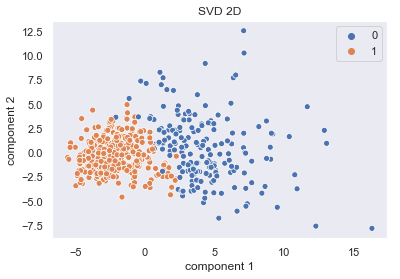

In [33]:
# Plot 2 components
sns.scatterplot(svd2DF['svd_comp_1'], svd2DF['svd_comp_2'], hue=cluster2.labels_) 
plt.title('SVD 2D')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

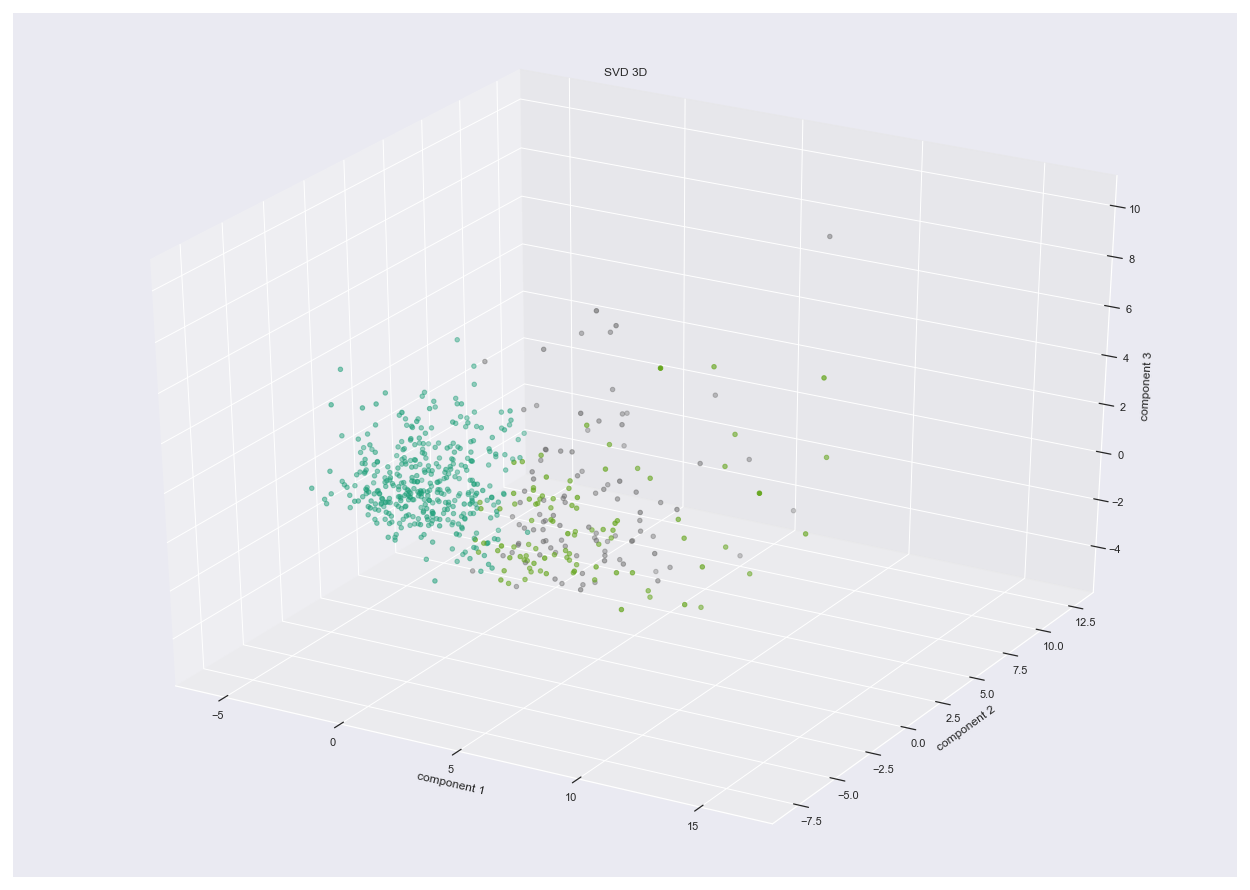

In [35]:
# Plot 3 components
fig = plt.figure(figsize=(17, 12))
ax = Axes3D(fig)
ax.scatter(svd3DF['svd_comp_1'], svd3DF['svd_comp_2'], svd3DF['svd_comp_3'], c=cluster3.labels_, cmap='Dark2')
plt.title('SVD 3D')
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()

# Change 'n_iter' parameter

In [36]:
# SVD for 2 and 3 components
svd2 = TruncatedSVD(2, n_iter=15)
svd3 = TruncatedSVD(3, n_iter=15)

x_svd2 = svd2.fit_transform(x_std)
x_svd3 = svd3.fit_transform(x_std)

svd2DF = pd.DataFrame(data=x_svd2, columns=['svd_comp_1', 'svd_comp_2'])
svd3DF = pd.DataFrame(data=x_svd3, columns=['svd_comp_1', 'svd_comp_2', 'svd_comp_3'])

# Vizualize results

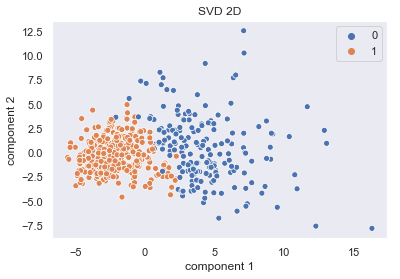

In [37]:
# Plot 2 components
sns.scatterplot(svd2DF['svd_comp_1'], svd2DF['svd_comp_2'], hue=cluster2.labels_) 
plt.title('SVD 2D')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

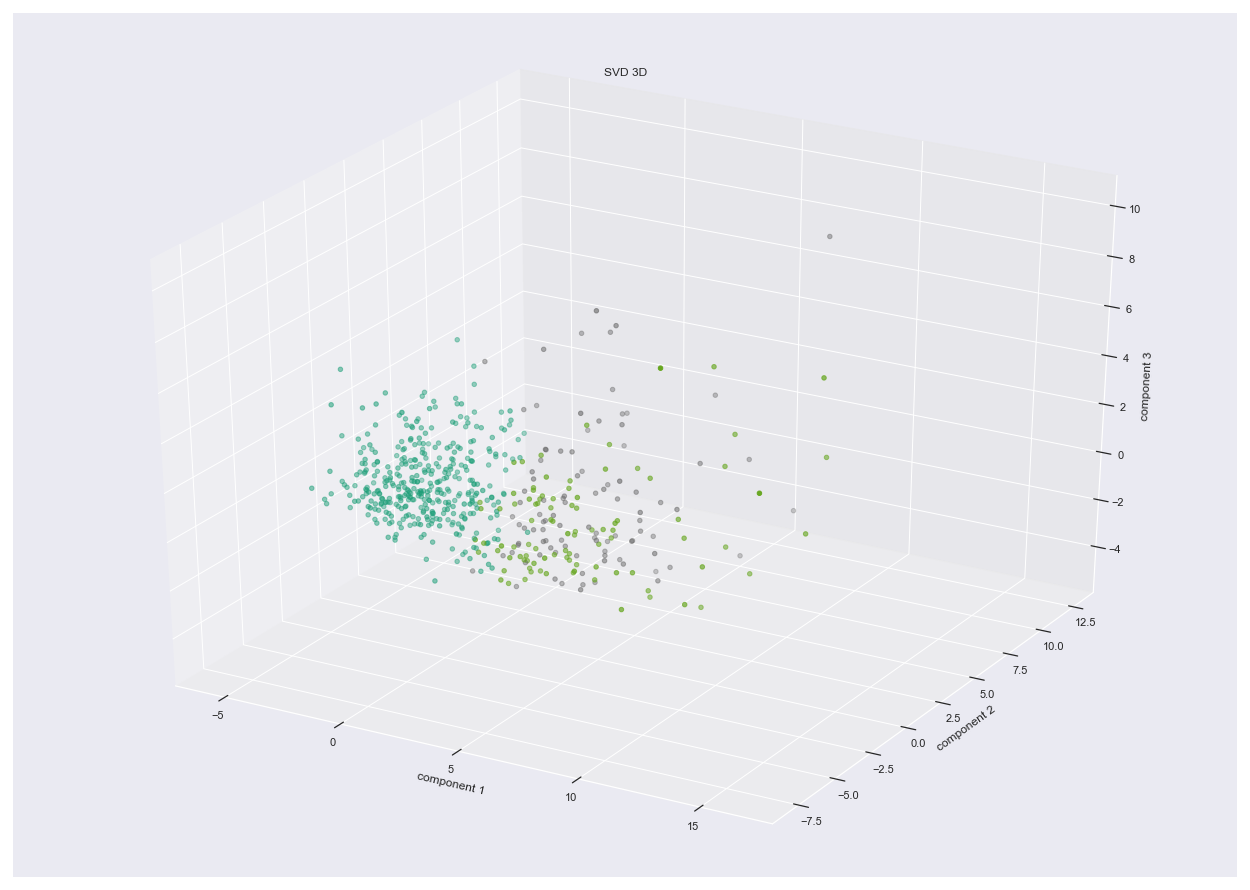

In [38]:
# Plot 3 components
fig = plt.figure(figsize=(17, 12))
ax = Axes3D(fig)
ax.scatter(svd3DF['svd_comp_1'], svd3DF['svd_comp_2'], svd3DF['svd_comp_3'], c=cluster3.labels_, cmap='Dark2')
plt.title('SVD 3D')
plt.xlabel('component 1')
plt.ylabel('component 2')
ax.set_zlabel('component 3')
plt.show()

# 8) Подготовить рекомендательную систему с использованием SVD

## 8.1) LOAD DATA

In [39]:
links = pd.read_csv('ml-latest-small/links.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

In [40]:
print(links.shape)
links.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [41]:
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [42]:
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [43]:
print(tags.shape)
tags.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## 8.2) Data Exploration

In [44]:
# Check for missing values
print(movies.isnull().sum())
print(ratings.isnull().sum())
print(tags.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [45]:
# Check unique vals
unique_users = ratings.userId.unique().shape[0]
unique_movies = ratings.movieId.unique().shape[0]

print('Unique users: ', unique_users)
print('Unique movies: ', unique_movies)

Unique users:  610
Unique movies:  9724


In [46]:
# Count numbers of ratings in 'rating'
ratings_num = pd.DataFrame(ratings.groupby('rating').size(), columns=['num'])
ratings_num

,num
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


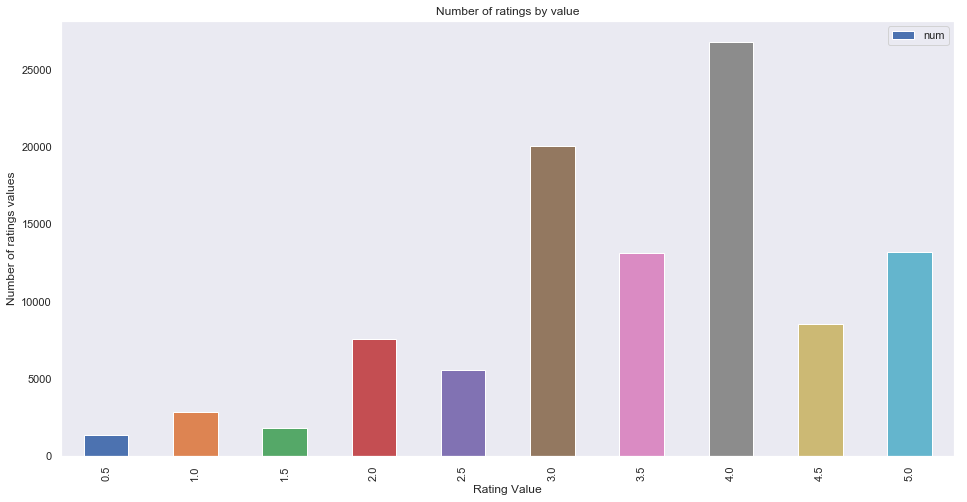

In [47]:
# Plot ratings by values
ratings_num[['num']].reset_index().plot(x='rating', y='num', kind='bar', figsize=(16, 8), title='Number of ratings by value')
plt.xlabel("Rating Value")
plt.ylabel("Number of ratings values")
plt.show()

In [48]:
movies_num = pd.DataFrame(ratings.groupby('movieId').size(), columns=['num'])
movies_num.head()

,num
movieId,
1,215
2,110
3,52
4,7
5,49


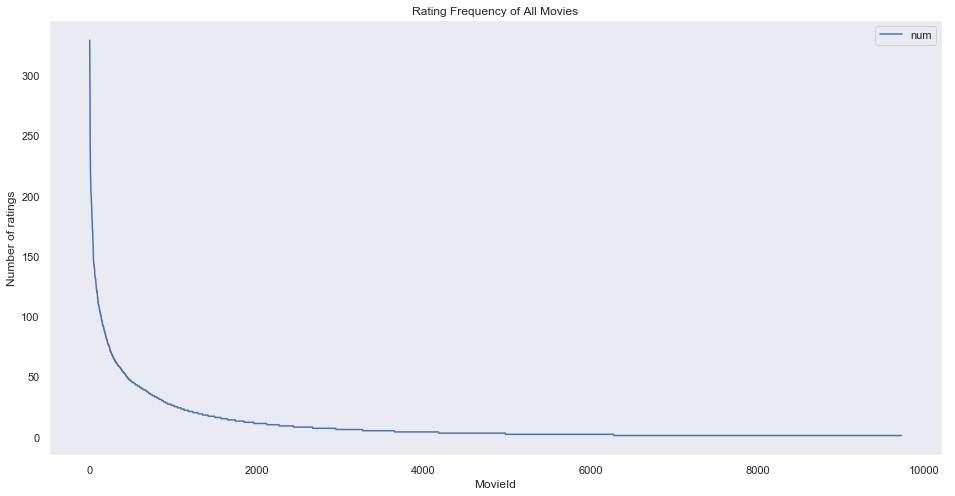

In [49]:
# Plot rating frequency of all movies
movies_num.sort_values('num', ascending=False).reset_index(drop=True).plot(figsize=(16, 8),title='Rating Frequency of All Movies')
plt.xlabel("MovieId")
plt.ylabel("Number of ratings")
plt.show()

In [50]:
# Quantiles of rating
movies_num['num'].quantile(np.arange(1, 0.5, -0.05))

1.00    329.0
0.95     47.0
0.90     27.0
0.85     17.0
0.80     12.0
0.75      9.0
0.70      7.0
0.65      5.0
0.60      4.0
0.55      3.0
Name: num, dtype: float64

### Распределение выше указывает на то, что  некоторые киноленты имеют больше оценок, чем другие, что говорит о популярности таких кинолент как таковых.

In [51]:
# Number of ratings by every user
users_num = pd.DataFrame(ratings.groupby('userId').size(), columns=['num'])
users_num.head()

,num
userId,
1,232
2,29
3,39
4,216
5,44


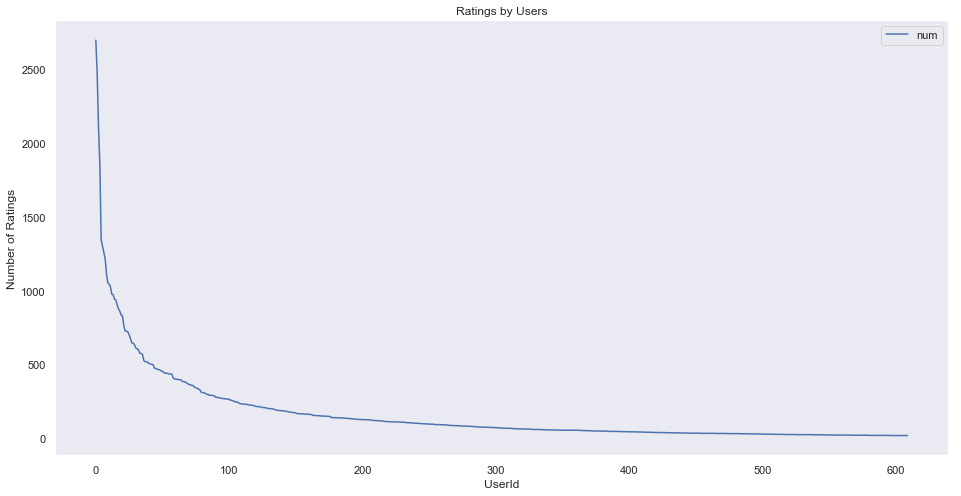

In [52]:
# Plot ratings numbers by users
users_num.sort_values('num', ascending=False).reset_index(drop=True).plot(figsize=(16, 8), title='Ratings by Users')
plt.xlabel("UserId")
plt.ylabel("Number of Ratings")
plt.show()

In [53]:
# Quantiles of users
users_num['num'].quantile(np.arange(1, 0.5, -0.05))

1.00    2698.00
0.95     610.75
0.90     400.30
0.85     278.30
0.80     216.00
0.75     168.00
0.70     140.00
0.65     119.00
0.60     101.40
0.55      84.95
Name: num, dtype: float64

### Распределение выше указывает на то, что  некоторые юзеры более активные и ставят больше оценок кинолентам, чем другие юзеры. Технически, можно урезать количество юзеров в датасете, удалив самых неактивных, хоть это и сделает предикты для неактивных юзеров менее точными. 

## 8.3) Build SVD model

### Для быстрого и эффективного создания рекомендательной системы на основе SVD алгоритма, я воспользуюсь "surprise" библиотекой. 

### Data loading and Evaluation

In [54]:
from surprise import Reader, Dataset, SVD, evaluate

# Build Reader
reader = Reader()

# Create dataset
data_set = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the dataset for 5-fold evaluation
data_set.split(n_folds=5)

# Build SVD model
svd_model = SVD()

# Compute the RMSE and MAE of the SVD algorithm.
evaluate(svd_model, data_set, measures=['RMSE', 'MAE'])

C:\Users\Ollit\AppData\Local\Programs\Python\Python36\lib\site-packages\surprise\evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
C:\Users\Ollit\AppData\Local\Programs\Python\Python36\lib\site-packages\surprise\dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8806
MAE:  0.6770
------------
Fold 2
RMSE: 0.8688
MAE:  0.6680
------------
Fold 3
RMSE: 0.8720
MAE:  0.6682
------------
Fold 4
RMSE: 0.8704
MAE:  0.6690
------------
Fold 5
RMSE: 0.8734
MAE:  0.6727
------------
------------
Mean RMSE: 0.8731
Mean MAE : 0.6710
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'rmse': [0.8806245403255806,
                             0.86881632750303,
                             0.8719686678429361,
                             0.8704249744745696,
                             0.8734379798788652],
                            'mae': [0.6769816032608101,
                             0.6679742434578768,
                             0.6681875327926762,
                             0.6690370678578659,
                             0.6727356222200978]})

### Train model

In [55]:
train_data_set = data_set.build_full_trainset()
svd_model.train(train_data_set)

C:\Users\Ollit\AppData\Local\Programs\Python\Python36\lib\site-packages\surprise\prediction_algorithms\algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


### Build recommendation function

In [58]:
def make_recommdendation(svd_model, userId, movies, ratings, n_recommends):
    
    assert (userId > min(ratings.userId.values -1) and userId < max(ratings.userId.values + 1))
    
    movies_pred_ratings = []
    movies_id = []
    movies_names = []
    for movie, title in zip(movies.movieId.values, movies.title.values):
        preds = svd_model.predict(userId, movie)
        
        movies_id.append(preds.iid)
        movies_pred_ratings.append(preds.est)
        movies_names.append(title)
        
    
    recommendations = pd.DataFrame(data=[movies_id, movies_pred_ratings, movies_names],
                                   index=['MovieId', 'ExpectRating', 'Title']).T
    recommendations = recommendations.sort_values('ExpectRating', ascending=False).reset_index(drop=True)
    
    return recommendations[0:n_recommends]

In [81]:
# Make some recommendations
user_id = 445
n_recommends = 50            # Number of movies to recommend

recommendations = make_recommdendation(svd_model, user_id, movies, ratings, n_recommends)
recommendations

,MovieId,ExpectRating,Title
0,2571,4.4759,"Matrix, The (1999)"
1,2959,4.46808,Fight Club (1999)
2,260,4.42225,Star Wars: Episode IV - A New Hope (1977)
3,898,4.4179,"Philadelphia Story, The (1940)"
4,1136,4.40923,Monty Python and the Holy Grail (1975)
5,1198,4.37002,Raiders of the Lost Ark (Indiana Jones and the...
6,6874,4.35984,Kill Bill: Vol. 1 (2003)
7,47,4.35114,Seven (a.k.a. Se7en) (1995)
8,318,4.34589,"Shawshank Redemption, The (1994)"
9,7153,4.34188,"Lord of the Rings: The Return of the King, The..."


# 8.4) SUMMARY


### Используя только такой Collaborative Filtering  подход с использыванием SVD алгоритма для создания рекомендовательной системы даёт следующий результат: каждому юзеру рекомендуються разные киноленты с разными expected ratings, но в ЦЕЛОМ наблюдается тенденция в виде рекомендаций кинолент, которые обьективно имеют высокие оценки среди всех юзеров.